# Image Preprocessing

Testing image preprocessing routines.

In [21]:
# importing 
import h5py
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
path = "../data/processed/pfa_new/a_pfa.h5"

f = h5py.File(path, 'r')

print("Loaded dataset from {} with {} unique signs".format(path, len(f.keys())))

Loaded dataset from ../data/processed/pfa_new/a_pfa.h5 with 278 unique signs


In [17]:
test_sign = '1'

group = f[test_sign]
print("{} examples of sign {}".format(len(group.keys()), test_sign))

2743 examples of sign 1


dataset attributes: 
 type (111, 90, 3) 
 shape uint8 



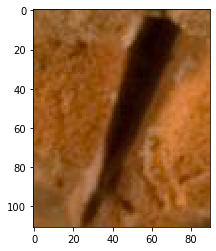

In [38]:
test_indx = list(group.keys())[60]

dset = group[test_indx]
print("dataset attributes: \n type {} \n shape {} \n".format(dset.shape, dset.dtype))
# get numpy array
dset_numpy = dset.value

# opencv image color ordering is wrong (BGR instead of RGB)
dset_corrected = dset_numpy[:,:,::-1]

plt.imshow(dset_corrected)


# Testing: Histogram Equalization

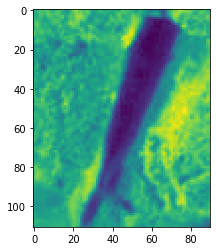

In [41]:
# copy image and convert to grayscale 

img_test = np.array(dset_numpy)
img_gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)

# make image histogram
hist,bins = np.histogram(img_gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

# plt.hist(img.flatten(),256,[0,256], color = 'r')
# plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
# plt.plot(cdf_normalized, color = 'b')

# simple histogram equalization
equalized = cv2.equalizeHist(img_gray)

# new histogram

# hist,bins = np.histogram(equalized.flatten(),256,[0,256])

# cdf = hist.cumsum()
# cdf_normalized = cdf * hist.max()/ cdf.max()
# plt.hist(equalized.flatten(),256,[0,256], color = 'r')
# plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
# plt.plot(cdf_normalized, color = 'b')

# adaptive histogram

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

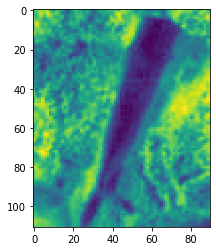

In [49]:
# testing adaptive histogram


plt.imshow(cl1)

# Testing: Otsu Thresholding

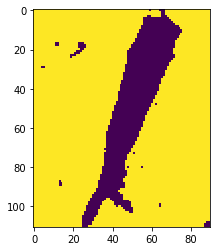

In [55]:
# otsu thresholding on original image

ret1, thresh1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh1)

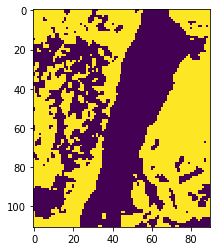

In [56]:
# otsu thresholding on equalized image

ret2, thresh2 = cv2.threshold(equalized, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(thresh2)

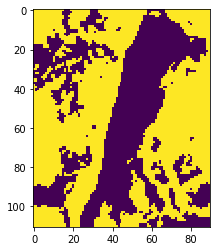

In [57]:
# otsu thresholding on adaptive equalized image

ret3, thresh3 = cv2.threshold(cl1, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(thresh3)

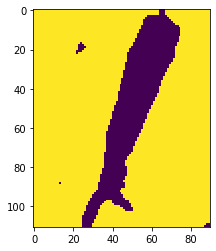

In [59]:
# otsu thresholding with gaussian blur

blur = cv2.GaussianBlur(img,(5,5),0)
ret4, thresh4 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(thresh4)

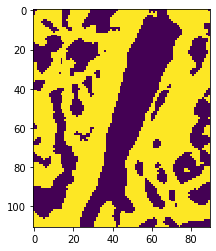

In [65]:
# adaptive thresholding with gaussian blur
blur2 = cv2.medianBlur(img,5)
th5 = cv2.adaptiveThreshold(blur2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,51,2)

plt.imshow(th5)